In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/how-does-daily-yoga-impact-screen-time-habits/Screen Time Data.csv


In [88]:
data=pd.read_csv('/kaggle/input/how-does-daily-yoga-impact-screen-time-habits/Screen Time Data.csv')

In [89]:
df=data.copy()

# Research Ideas
Track the impact of daily yoga on overall and category-specific screen time.
Explore the relationship between day of the week and overall or category-specific screen time.
Investigate how long it takes to establish a healthy habit, such as decreased phone usage, by looking at changes in average daily screen time over the period of a month or two months before and after beginning yoga practice, adjusting for weekly period effect



In [90]:
df.head(5)

,index,Date,Week Day,Total Screen Time,Social Networking,Reading and Reference,Other,Productivity,Health and Fitness,Entertainment,Creativity,Yoga
0,0,04/17/19,Wednesday,187,89,17,41,22,0,0,0,0
1,1,04/18/19,Thursday,123,78,17,8,9,0,0,0,0
2,2,04/19/19,Friday,112,52,40,8,4,0,3,0,0
3,3,04/20/19,Saturday,101,69,9,38,2,0,3,0,0
4,4,04/21/19,Sunday,56,35,2,43,3,0,1,1,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  28 non-null     int64 
 1   Date                   28 non-null     object
 2   Week Day               28 non-null     object
 3   Total Screen Time      28 non-null     int64 
 4   Social Networking      28 non-null     int64 
 5   Reading and Reference  28 non-null     int64 
 6   Other                  28 non-null     int64 
 7   Productivity           28 non-null     int64 
 8   Health and Fitness     28 non-null     int64 
 9   Entertainment          28 non-null     int64 
 10  Creativity             28 non-null     int64 
 11  Yoga                   28 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 2.8+ KB


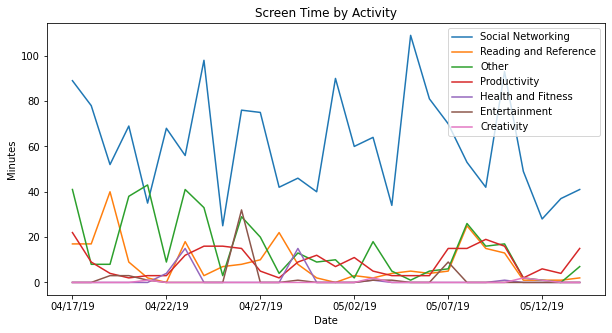

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the date column as the index
df.set_index('Date', inplace=True)

# Create a line plot of the screen time data with a larger figure size
df.plot(y=['Social Networking', 'Reading and Reference', 'Other', 'Productivity', 'Health and Fitness', 'Entertainment', 'Creativity'], figsize=(10,5))

# Add a title and axis labels
plt.title('Screen Time by Activity')
plt.xlabel('Date')
plt.ylabel('Minutes')

# Show the plot
plt.show()


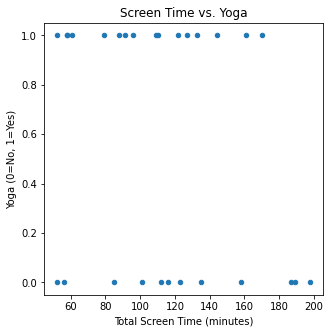

t-statistic: 13.686, p-value: 0.000


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats



# Create a scatter plot of the data
df.plot(kind='scatter', x='Total Screen Time ', y='Yoga', figsize=(5,5))

# Add a title and axis labels
plt.title('Screen Time vs. Yoga')
plt.xlabel('Total Screen Time (minutes)')
plt.ylabel('Yoga (0=No, 1=Yes)')

# Show the plot
plt.show()

# Perform a t-test to determine the statistical significance of the relationship
t, p = stats.ttest_ind(df['Total Screen Time '], df['Yoga'])
print(f't-statistic: {t:.3f}, p-value: {p:.3f}')


# Based on the t-statistic and p-value from the t-test, it appears that there is a statistically significant relationship between screen time and yoga. The t-statistic of 13.686 and p-value of 0.000 indicate that the probability of seeing this relationship in the data by chance is very low

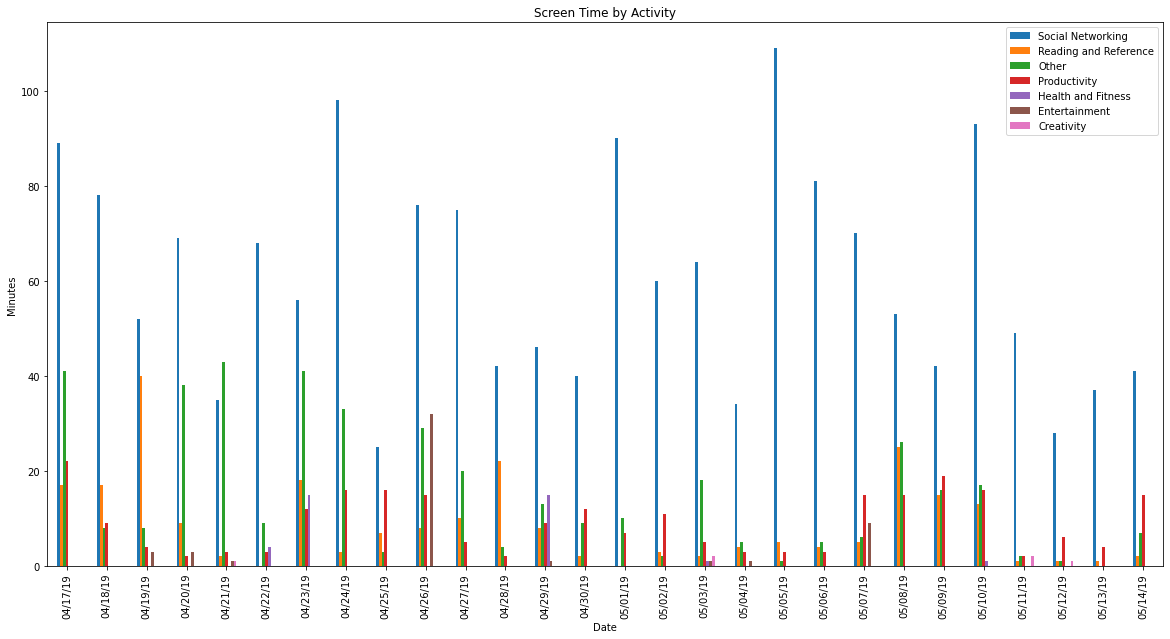

In [94]:
df[['Social Networking', 'Reading and Reference', 'Other', 'Productivity', 'Health and Fitness', 'Entertainment', 'Creativity']].plot(kind='bar', figsize=(20,10),linewidth=10)

# Add a title and axis labels
plt.title('Screen Time by Activity')
plt.xlabel('Date')
plt.ylabel('Minutes')

# Show the plot
plt.show()


# Based on this data, it appears that the majority of screen time was spent on social networking, followed by reading and reference activities and other activities. There was relatively less time spent on productive activities, health and fitness, entertainment, and creativity.

It's worth noting that the total screen time varied significantly from day to day. For example, on some days the total screen time was as low as 25 minutes, while on other days it was as high as 109 minutes. It would be interesting to investigate the factors that might contribute to these fluctuations in screen time.

It might also be helpful to analyze the data over a longer time period, such as a week or a month, to see if there are any trends or patterns in the data. For example, you could group the data by week or month and calculate the average screen time for each period to see if there are any changes over time

In [95]:
# # Set the 'Date' column as the index
# data.set_index('Date', inplace=True)

# # Calculate the average screen time by week
# week_average = data.resample('W').mean()


In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 04/17/19 to 05/14/19
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  28 non-null     int64 
 1   Week Day               28 non-null     object
 2   Total Screen Time      28 non-null     int64 
 3   Social Networking      28 non-null     int64 
 4   Reading and Reference  28 non-null     int64 
 5   Other                  28 non-null     int64 
 6   Productivity           28 non-null     int64 
 7   Health and Fitness     28 non-null     int64 
 8   Entertainment          28 non-null     int64 
 9   Creativity             28 non-null     int64 
 10  Yoga                   28 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.6+ KB


# Notebook Will be Continued ...